In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load dataset
df = pd.read_excel('glass.xlsx', sheet_name='glass')

# Check structure
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['Type'].value_counts())

Shape: (214, 10)

First 5 rows:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Data types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Class distribution:
 Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


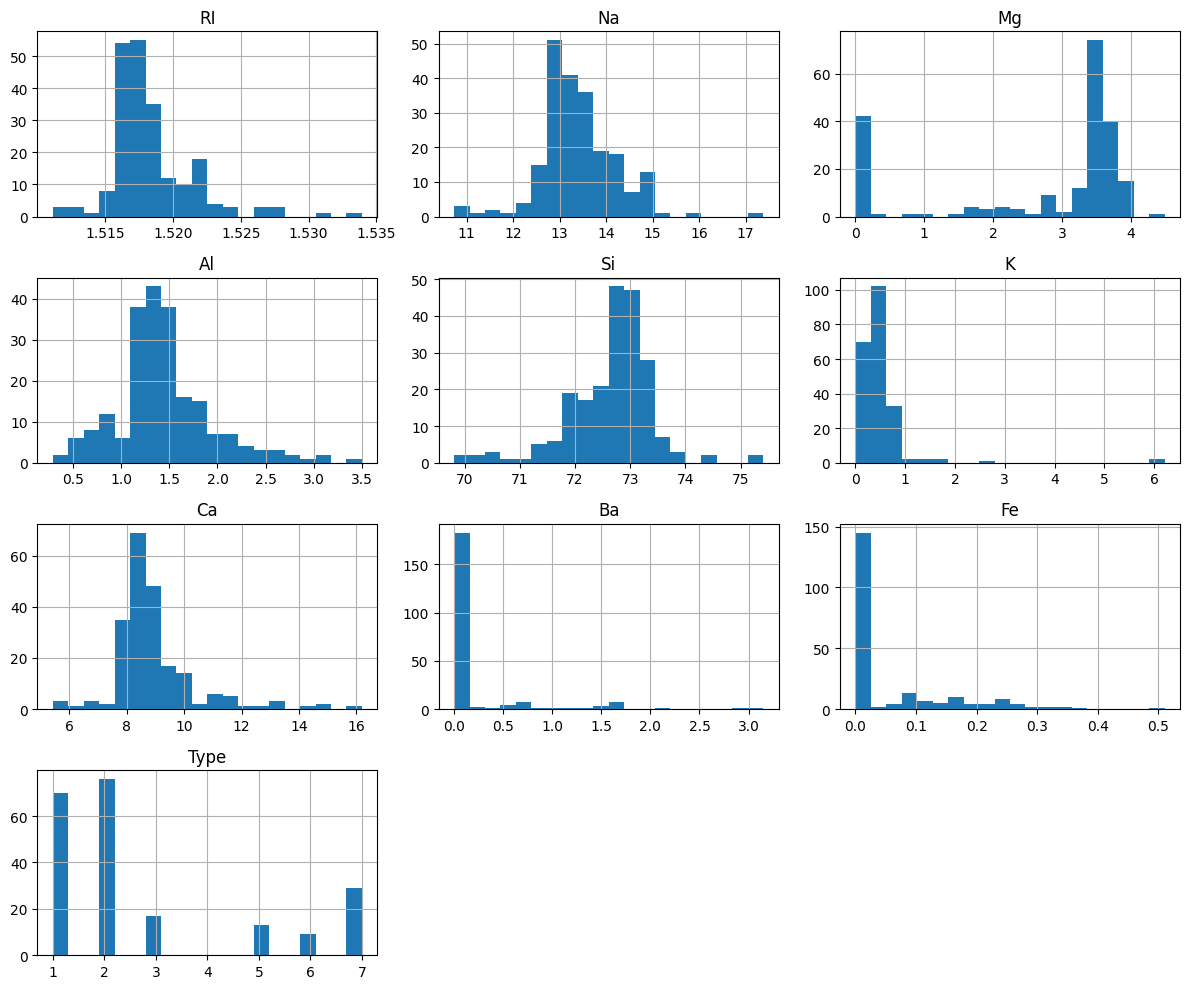

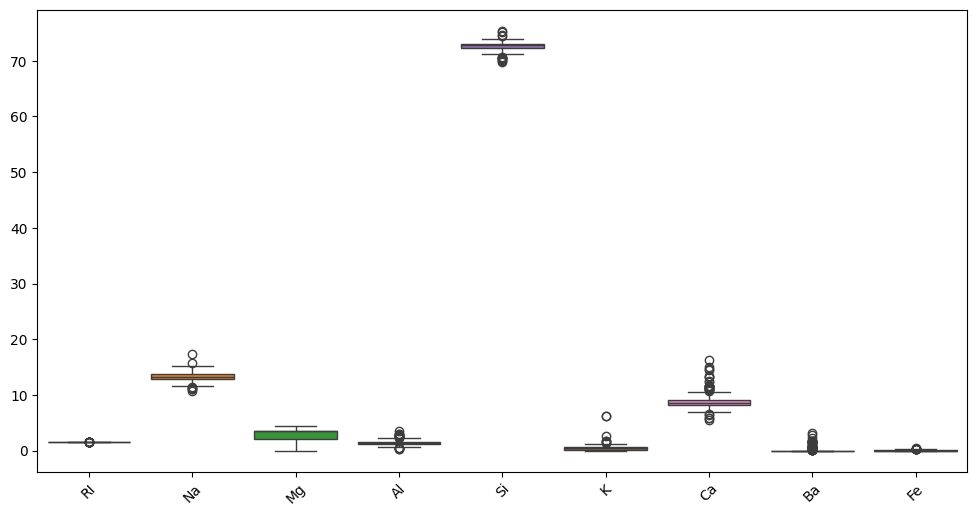

In [ ]:
# Histograms
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplots for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Type', axis=1))
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert 'Type' to integer
df['Type'] = df['Type'].astype(int)

# Split features (X) and target (y)
X = df.drop('Type', axis=1)
y = df['Type']

# Split data into train/test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (optional for Random Forest but included for comparison)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train model with class weights for imbalance
rf = RandomForestClassifier(
    class_weight='balanced', random_state=42
)
rf.fit(X_train_scaled, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))



In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag.fit(X_train_scaled, y_train)
y_pred_bag = bag.predict(X_test_scaled)
print("Bagging Report:\n", classification_report(y_test, y_pred_bag))

Bagging Report:
               precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.80        43
weighted avg       0.82      0.81      0.81        43



In [ ]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)
print("AdaBoost Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Report:
               precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       0.40      0.53      0.46        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.50      0.67         2
           7       0.80      0.67      0.73         6

    accuracy                           0.49        43
   macro avg       0.49      0.38      0.42        43
weighted avg       0.53      0.49      0.50        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Step 7: Key Concepts
Bagging vs. Boosting:

    Bagging: Trains multiple models (e.g., decision trees) on random subsets of data and averages predictions. Reduces variance. Example: Random Forest.

    Boosting: Trains models sequentially, where each corrects errors of the previous. Reduces bias. Example: AdaBoost.

Handling Imbalance:

    Use class_weight='balanced' in models.

    Resample data (e.g., SMOTE for oversampling minority classes).

Final Notes
    Random Forest performed best with 74% accuracy and balanced metrics.

    Class imbalance impacts minority classes